# Baselines

In this document we run the following baselines on only the numerical data in our dataset:
- Random Guess 
- Guess all n (0,1,2,3,4)
- Linear Regression
- Decision Tree

In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import pandas as pd
from glob import glob

import matplotlib.pyplot as plt

# Import our files
import data
import baseline_models

## Data Preprocessing

In [3]:
train_images = "data/train_images/*"
test_images = "data/teset_images/*"

breed_labels_file = "data/breed_labels.csv"
state_labels_file = "data/state_labels.csv"
color_labels_file = "data/color_labels.csv"
test_file = "data/test.csv"
train_file = "data/train.csv"

In [4]:
# Load all data
train_df = pd.read_csv("data/train/train.csv")
test_df = pd.read_csv("data/test/test.csv")

# Labels contain information for analyzing results, but not for model
breed_labels_df = pd.read_csv("data/breed_labels.csv")
state_labels_df = pd.read_csv("data/state_labels.csv")
color_labels_df = pd.read_csv("data/color_labels.csv")

In [5]:
# For linear regression just keep the numeric columns
y_col = 'AdoptionSpeed'

train_x_df = train_df[data.numeric_cols].copy()
train_y_df = train_df[[y_col]].copy()
test_x_df = test_df[data.numeric_cols].copy()

In [6]:
for col, num_class in data.one_hot_cols.items():
    if col is not 'Breed1' and col is not 'Breed2':
        data.one_hot_encode(train_x_df, col, num_class, inplace=True)
        data.one_hot_encode(test_x_df, col, num_class, inplace=True)
        print("One hot encoding {} with {} classes...".format(col, num_class))

One hot encoding Type with 2 classes...
One hot encoding Gender with 3 classes...
One hot encoding Color1 with 7 classes...
One hot encoding Color2 with 7 classes...
One hot encoding Color3 with 7 classes...
One hot encoding MaturitySize with 5 classes...
One hot encoding FurLength with 4 classes...
One hot encoding Vaccinated with 3 classes...
One hot encoding Dewormed with 3 classes...
One hot encoding Sterilized with 3 classes...
One hot encoding Health with 4 classes...
One hot encoding State with 15 classes...


In [7]:
final_columns = list(set(list(train_x_df.columns.values) + list(test_x_df.columns)))
print(len(final_columns), final_columns)

64 ['Health_1', 'Color2_2', 'Gender_3', 'MaturitySize_1', 'Sterilized_3', 'State_41335', 'Sterilized_2', 'Dewormed_2', 'Color3_5', 'State_41336', 'State_41325', 'State_41367', 'Color2_3', 'PhotoAmt', 'State_41401', 'Color3_3', 'Color1_7', 'Color2_6', 'Color3_7', 'State_41327', 'Color1_3', 'Vaccinated_1', 'Breed1', 'Type', 'State_41361', 'Color3_6', 'Sterilized_1', 'Color1_5', 'State_41326', 'Quantity', 'State_41415', 'Color1_1', 'Health_3', 'Gender_2', 'Color3_4', 'Color1_4', 'MaturitySize_3', 'FurLength_3', 'State_41324', 'Color2_5', 'Color3_0', 'Gender_1', 'Age', 'Color1_6', 'Color1_2', 'State_41332', 'Color2_4', 'Dewormed_3', 'Dewormed_1', 'State_41330', 'Vaccinated_3', 'Health_2', 'State_41345', 'Fee', 'FurLength_2', 'State_41342', 'MaturitySize_2', 'MaturitySize_4', 'Color2_7', 'Color2_0', 'FurLength_1', 'Vaccinated_2', 'VideoAmt', 'Breed2']


In [8]:
# Make sure that train and test have the same columns 
for col in final_columns:
    if col not in train_x_df.columns:
        print("Adding column '{}' to train_x_df".format(col))
    if col not in test_x_df.columns:
        print("Adding column '{}' to test_x_df".format(col))
        test_x_df[col] = 0
    

Adding column 'State_41415' to test_x_df


In [9]:
# Create a validation set from training set
msk = np.random.rand(len(train_x_df)) < 0.8
valid_x_df = train_x_df[~msk]
train_x_df = train_x_df[msk]
valid_y_df = train_y_df[~msk]
train_y_df = train_y_df[msk]

print("Train x shape: {}, Train y shape {}".format(train_x_df.shape, train_y_df.shape))
print("Valid x shape: {}, Valid y shape {}".format(valid_x_df.shape, valid_y_df.shape))
print("Test shape: {}". format(test_x_df.shape))

Train x shape: (12017, 64), Train y shape (12017, 1)
Valid x shape: (2976, 64), Valid y shape (2976, 1)
Test shape: (3948, 64)


## Run random guess

In [10]:
random_guess_y = baseline_models.random_guess(train_x_df)

In [11]:
print( len(random_guess_y) )
print( len(train_x_df) )

12017
12017


In [12]:
random_guess_pred = baseline_models.run_random_guess((train_x_df, train_y_df), (train_x_df, train_y_df), test_x_df)

Running random guess...
'Training' accuracy: 0.19439127902138637
'Validation' accuracy: 0.20054922193559124


In [13]:
print(random_guess_pred)

[1 0 0 ... 1 0 4]


## Run all 'n' guesses

In [14]:
all_0_y = baseline_models.all_0(train_x_df)
print(all_0_y)
all_1_y = baseline_models.all_1(train_x_df)
print(all_1_y)
all_2_y = baseline_models.all_2(train_x_df)
print(all_2_y)
all_3_y = baseline_models.all_3(train_x_df)
print(all_3_y)
all_4_y = baseline_models.all_4(train_x_df)
print(all_4_y)

[0. 0. 0. ... 0. 0. 0.]
[1. 1. 1. ... 1. 1. 1.]
[2. 2. 2. ... 2. 2. 2.]
[3. 3. 3. ... 3. 3. 3.]
[4. 4. 4. ... 4. 4. 4.]


In [15]:
all_pred = baseline_models.run_all_n_guess((train_x_df, train_y_df), (train_x_df, train_y_df), test_x_df)

Running all '0' guess...
'Training' accuracy: 0.02754431222434884
'Validation' accuracy: 0.02754431222434884
Running all '1' guess...
'Training' accuracy: 0.20454356328534576
'Validation' accuracy: 0.20454356328534576
Running all '2' guess...
'Training' accuracy: 0.26936839477407004
'Validation' accuracy: 0.26936839477407004
Running all '3' guess...
'Training' accuracy: 0.21702588000332862
'Validation' accuracy: 0.21702588000332862
Running all '4' guess...
'Training' accuracy: 0.2815178497129067
'Validation' accuracy: 0.2815178497129067


In [16]:
print(all_pred)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 [2. 2. 2. ... 2. 2. 2.]
 [3. 3. 3. ... 3. 3. 3.]
 [4. 4. 4. ... 4. 4. 4.]]


## Run Linear Regression

In [17]:
test_pred = baseline_models.linear_regression((train_x_df, train_y_df), (valid_x_df, valid_y_df), test_x_df)

Training accuracy: 0.2630440209702921
Validation accuracy: 0.26713709677419356


In [18]:
print(test_pred)

[[2.]
 [3.]
 [3.]
 ...
 [2.]
 [2.]
 [3.]]


## Run Decision Tree

In [19]:
clf, test_pred = baseline_models.decision_tree((train_x_df, train_y_df), (valid_x_df, valid_y_df), test_x_df)

Training accuracy: 0.9861862361654323
Validation accuracy: 0.3430779569892473


In [20]:
print(test_pred)

[1 2 4 ... 1 3 2]


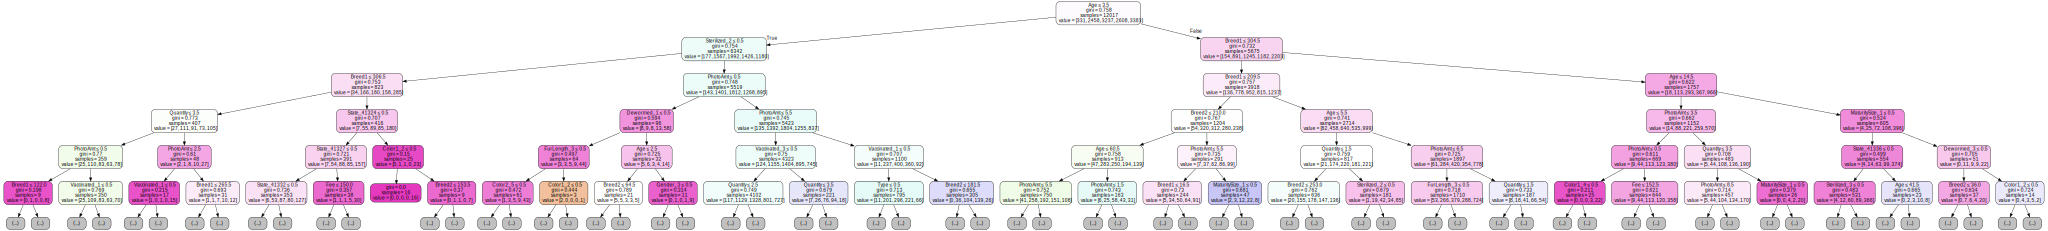

In [21]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(clf, out_file=None, 
                     filled=True, rounded=True,  
                     special_characters=True, max_depth=5,
                    feature_names=train_x_df.columns)  
graph = graphviz.Source(dot_data)  
graph
